In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Semilla de reproducibilidad

In [ ]:
SEED = 42
np.random.seed(SEED)

## Iris Dataset

En este tutorial usaremos el conjunto de datos de [iris](https://archive.ics.uci.edu/ml/datasets/Iris). El dataset contiene $150$ muestras de $3$ clases (setosa, versicolor y virginica) y $4$ características (largo del sépalo, ancho del sépalo, largo del pétalo, ancho del pétalo).

![alt text](https://www.researchgate.net/publication/349634676/figure/fig2/AS:995453013336067@1614345901799/Three-classes-of-IRIS-dataset-for-classification-17.jpg)


Podemos cargar el dataset directamente desde scikit-learn:

In [ ]:
from sklearn.datasets import load_iris

# Cargamos el dataset
iris = load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Conjunto de datos
X = iris.data

# Etiquetas
y = iris.target.reshape(-1,1)

# Imprimimos tamaño de conjunto de datos
print('Tamaño de la data: ', X.shape)
print('Tamaño de las etiquetas: ', y.shape)

Tamaño de la data:  (150, 4)
Tamaño de las etiquetas:  (150, 1)


Podemos unir ambos arreglos para craer un dataframe y poder analizar mejor los datos


In [ ]:
#data_np = np.concatenate([X, y], axis=1)
data_np = np.hstack([X, y])
feature_names = iris.feature_names + ["target"]
print(f'Feature names: {feature_names}')
print(f'Data size: {data_np.shape}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Data size: (150, 5)


In [ ]:
lista = []
lista.append(12)
lista.append(45)
print(lista)

lista3 = lista + [2,3, 5, 4, 1]
print(lista)
print(lista3)


[12, 45]
[12, 45]
[12, 45, 2, 3, 5, 4, 1]


Podemos ver el contenido del dataset usando ``print`` o podemos crear un dataframe para tener una mejor impresión:

In [ ]:
# Creamos dataframe solo para propósito de ver contenido de la data
# Conjunto de datos
data_df = pd.DataFrame(data=data_np, columns=feature_names)

data_df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


## Información del dataset

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Datos faltantes

In [ ]:
print("NaN en cada columna")
print(data_df.isna().sum())

NaN en cada columna
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


### Estadísticas

In [ ]:
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Análisis Exploratorio de Datos (EDA)

### Distribución de etiquetas

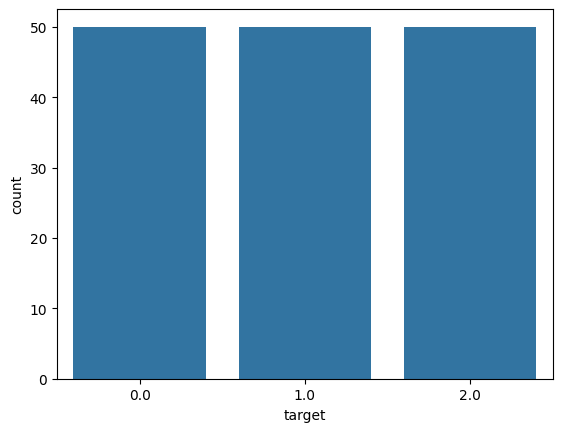

In [ ]:
# data is perfectly balanced
_ = sns.countplot(x='target', data=data_df)

### Distribución de características

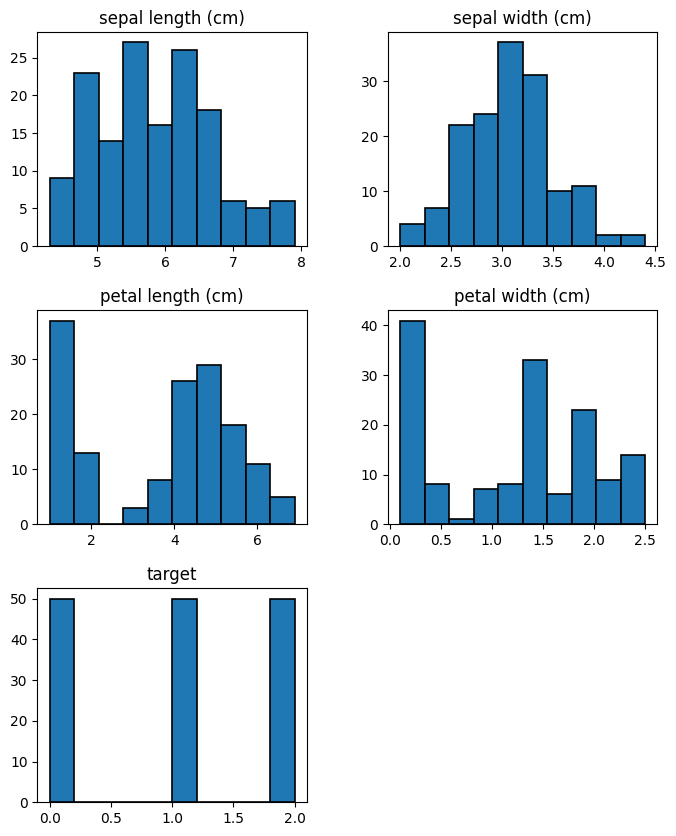

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
_ = data_df.hist(edgecolor = 'black', linewidth = 1.2, grid=False, figsize=(8,10))
#plt.show()

### Outliers

In [ ]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

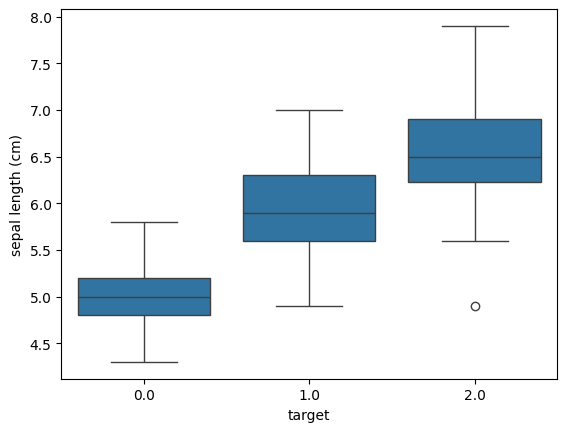

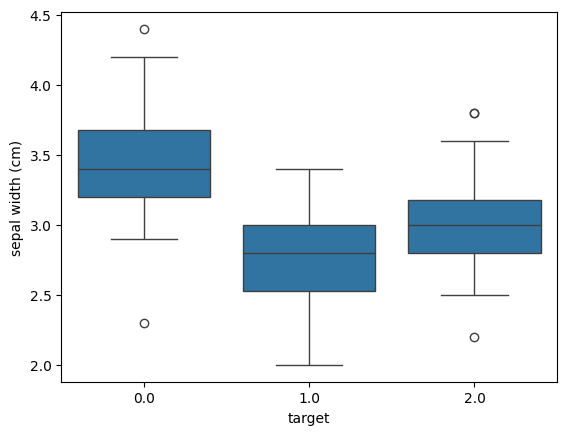

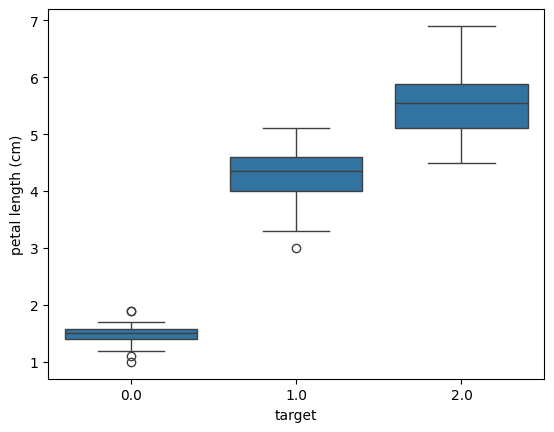

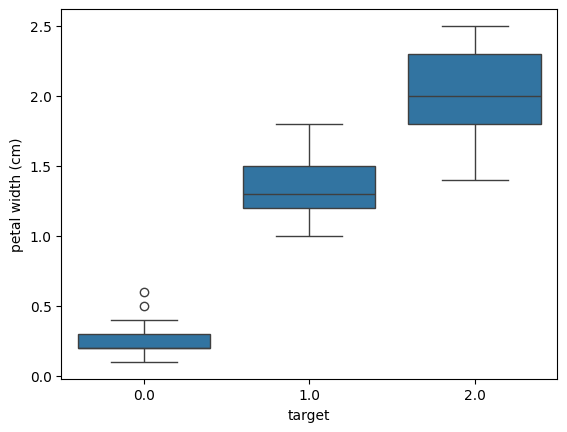

In [ ]:
for feature in feature_names[:-1]:
  sns.boxplot(x='target', y=feature, data=data_df)
  plt.show()

In [ ]:
#sns.boxplot(x='target', y=feature_names[0], data=data_df)
#plt.show()
#sns.boxplot(x='target', y=feature_names[1], data=data_df)

### Matriz de correlación

<Axes: >

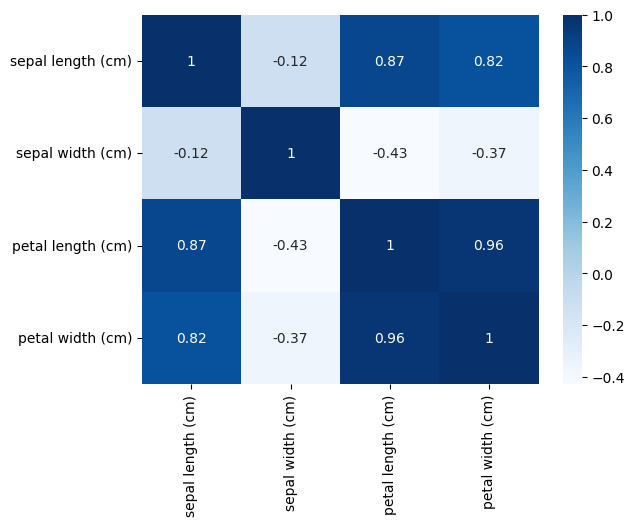

In [ ]:
sns.heatmap(data_df[feature_names[:-1]].corr(), annot=True, cmap=plt.cm.Blues)

## Separar data de etiquetas

In [ ]:
X = data_df.drop(['target'], axis=1)
y = data_df['target']

print(X.shape, y.shape)

(150, 4) (150,)


## Particionamiento de datos

El primer paso al momento de validar un modelo es particionar el conjunto de datos en entrenamiento, validación y prueba. Afortunadamente, ``scikit-learn`` ofrece una serie de métodos para ello. Pueden revisar mayor información desde la [documentación oficial](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

### Hold-out

Este tipo de particionamiento divide el conjunto de datos en un conjunto de "entrenamiento" y "prueba". Usamos el conjunto de entrenamiento para entrenar el modelo, y el conjunto de prueba se usa para ver qué tan bien ese modelo funciona en datos no vistos. Una división común cuando se usa el método de retención es usar el $80\%$ de los datos para el entrenamiento y el $20\%$ restante de los datos para las pruebas.

Para realizar el particionamiento Hold-out, podemos hacer uso del método [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split):

In [ ]:
import numpy as np
np.random.seed(124)
np.random.randn(3,5)

array([[ 0.28847906, -0.46295408, -1.33800442,  2.31701567, -1.46737593],
       [-0.74854769, -1.01752136,  1.6350668 ,  0.92254561, -0.71988132],
       [-0.96488339,  0.25358279,  0.3080074 , -0.071606  , -1.13548051]])

In [ ]:
# Importamos método de model_selection
from sklearn.model_selection import train_test_split

# Realizamos el particionamiento dado un porcentaje
_X_train, X_test, _y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

print('Tamaño original del dataset: ', X.shape)
print('Tamaño de la data de entrenamiento: ', _X_train.shape)
print('Tamaño de la data de prueba: ', X_test.shape)

Tamaño original del dataset:  (150, 4)
Tamaño de la data de entrenamiento:  (120, 4)
Tamaño de la data de prueba:  (30, 4)


In [ ]:
# 80 ---> 100%
# 20 --->  x
# x = 20 * 100/80 = 25
# Realizamos el particionamiento dado un porcentaje
X_train, X_val, y_train, y_val = train_test_split(_X_train, _y_train, train_size=0.75, random_state=SEED)
# 60, 20, 20
print('Tamaño original del dataset: ', X.shape)
print('---------------------------')
print('Tamaño de la data de entrenamiento: ', X_train.shape)
print('Tamaño de la data de validación: ', X_val.shape)
print('Tamaño de la data de prueba: ', X_test.shape)

Tamaño original del dataset:  (150, 4)
---------------------------
Tamaño de la data de entrenamiento:  (90, 4)
Tamaño de la data de validación:  (30, 4)
Tamaño de la data de prueba:  (30, 4)


## Preprocesamiento

Un paso muy importante antes de ingresar la data al modelo de machine learning, es la etapa de preprocesamiento. Pueden revisar diferentes técnicas de preprocesamiento en el siguiente [notebook](https://colab.research.google.com/drive/1-zm_Lf4_W4JueeLBf9caDr0_sZbpVP3J?usp=sharing) o revisar la documentación de scikit-learn dedicada a [preprocesamiento](https://scikit-learn.org/stable/modules/preprocessing.html).

A continuación mostraremos un ejemplo de estandarización.

### Estandarización

La estandarización (o **z-score**) es una técnica importante que se realiza principalmente como un paso de preprocesamiento antes de ingresar la data a un modelo de Machine Learning. Un problema muy frecuente en los conjuntos de datos es que muchas de sus características tienen grandes diferencias entre sus rangos (edad, salario, etc.) o simplemente se miden en diferentes unidades de medida (metros, millas, etc). Estas diferencias en los rangos causan problemas a muchos modelos de Machine Learning. Por ejemplo, para los modelos que se basan en el cálculo de la distancia, si una de las características tiene un amplio rango de valores, la distancia se regirá por esta característica en particular.

Para realizar la estandarización usaremos la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# Importamos la librería
from sklearn.preprocessing import StandardScaler

# Definimos el escalador
scaler = StandardScaler()

En el código anterior hemos definido el escalador, ahora necesitamos usar la data de entrenamiento para hallar las estadísticas de media y desviación estándar para aplicarlos luego en la data de validación y prueba. Para ello podemos hacerlo de dos formas, la primera es usando ``fit`` y luego ``transform``:

In [ ]:
# Usamos la data de entrenamiento para hallar las estadísticas
scaler.fit(X_train)

# Estandarizamos la data de entrenamiento
X_train_scaled = scaler.transform(X_train)

# Imprimimos algunos datos
print("Algunos datos de entrenamiento estandarizados")
print(X_train_scaled[0:6])

Algunos datos de entrenamiento estandarizados
[[ 2.23179814 -0.67959102  1.66256055  1.05988727]
 [-1.38082475  0.1910594  -1.35801675 -1.29219133]
 [-0.29703788 -0.24426581  0.43195499  0.4065321 ]
 [ 1.75011508 -0.46192842  1.43881409  0.7985452 ]
 [-0.05619636 -0.67959102  0.76757469  1.5825714 ]
 [ 0.54590746 -1.76790405  0.37601837  0.14519004]]


Podemos realizar el proceso anterior en un solo paso con el método ``fit_transform``:

In [ ]:
# Estandarizamos la data de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Imprimimos algunos datos
print("Algunos datos de entrenamiento estandarizados")
print(X_train_scaled[0:5])

Algunos datos de entrenamiento estandarizados
[[ 2.23179814 -0.67959102  1.66256055  1.05988727]
 [-1.38082475  0.1910594  -1.35801675 -1.29219133]
 [-0.29703788 -0.24426581  0.43195499  0.4065321 ]
 [ 1.75011508 -0.46192842  1.43881409  0.7985452 ]
 [-0.05619636 -0.67959102  0.76757469  1.5825714 ]]


Una vez halladas las estadísticas de media y desviación estándar, podemos estandarizar la data de validación usando solamente el método ``transform``:

In [ ]:
# Estandarizamos la data de validaciòn
X_val_scaled = scaler.transform(X_val)

print("Algunos datos de validación estandarizados")
print(X_val_scaled[0:5])

Algunos datos de validación estandarizados
[[ 0.18464517 -1.98556666  0.1522719  -0.24682306]
 [-0.41745864 -1.76790405  0.1522719   0.14519004]
 [-1.74208703  0.1910594  -1.35801675 -1.29219133]
 [-1.13998322 -0.02660321 -1.24614352 -1.29219133]
 [-0.77872093  0.62638461 -1.30208013 -1.29219133]]


De esta forma podemos estandarizar tanto la data de entrenamiento como la de validación y prueba.

## Clasificación con KNN

K-Nearest Neighbors (kNN) es una de las estrategias de aprendizaje más simples: dada una observación nueva y desconocida, buscamos en la base de datos de referencia cuáles tienen las características más cercanas y asignamos la clase predominante.

Scikit-learn nos ofrece diferentes implementaciones de KNN para diferentes tareas, en nuestro caso estamos realizando clasificación, por lo tanto podemos usar la clase [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):

In [ ]:
# Importamos al clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

# Creamos una instancia del clasificador y especificamos hiperparámetros
model = KNeighborsClassifier(n_neighbors=1)

Podemos entrenar el modelo haciendo uso del método ``.fit()``:

In [ ]:
# Entrenamos el módelo
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

Podemos realizar predicciones haciendo uso del método ``.predict()`` sobre el modelo ya entrenado:

In [ ]:
# Realizamos predicciones
y_train_pred = model.predict(X_train_scaled)

Podemos calcular métricas de evaluación como accuracy haciendo uso del API [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html):

In [ ]:
# Importamos librería para calcular el accuracy
from sklearn.metrics import accuracy_score

# Calculamos el accuracy
train_acc = accuracy_score(y_train, y_train_pred)

# Imprimimos el accuracy
print(f'Accuracy de entrenamiento: {train_acc}')

Accuracy de entrenamiento: 1.0


Veamos las predicciones en validación

In [ ]:
# Predicciones de validación
y_val_pred = model.predict(X_val_scaled)

# Calculamos el accuracy
val_acc = accuracy_score(y_val, y_val_pred)

# Imprimimos el accuracy
print(f'Accuracy de validación: {val_acc:.3f}')

Accuracy de validación: 0.933


# Ejercicio

## 1. Encontrar el mejor valor de K

Dado un rango de candidatos para el valor de K realizar lo siguiente:
- Entrenar el modelo KNN con cada valor candidato
- Obtener predicciones para la data de validación
- Calcular el accuracy de validación y almacenar los resultados en una lista
- Visualizar y analizar el accuracy para cada candidato
- Obtener el mejor valor de K



In [ ]:
#k_candidates = range(1, 51)
#val_scores = []

# Entrenar el modelo KNN con cada valor candidato "k" que se encuentra en la variable k_candidates
# Obtener el accuracy de validación y almacenarlo en la lista val_scores

from sklearn.neighbors import KNeighborsClassifier
k_candidates = range(1, 51)
val_scores = []

for k in k_candidates:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f'Accuracy de validación k{k}: {val_acc:.3f}')
    val_scores.append(val_acc)
    #score = val_acc
    #val_scores.append(score)
#print("Validation scores:", val_scores)
#print(val_scores)
maximo_valor = max(val_scores)
print(f'Valor máximo: {maximo_valor}')

Accuracy de validación k1: 0.933
Accuracy de validación k2: 0.900
Accuracy de validación k3: 0.933
Accuracy de validación k4: 0.900
Accuracy de validación k5: 0.900
Accuracy de validación k6: 0.900
Accuracy de validación k7: 0.900
Accuracy de validación k8: 0.900
Accuracy de validación k9: 0.900
Accuracy de validación k10: 0.900
Accuracy de validación k11: 0.933
Accuracy de validación k12: 0.933
Accuracy de validación k13: 0.933
Accuracy de validación k14: 0.933
Accuracy de validación k15: 0.933
Accuracy de validación k16: 0.933
Accuracy de validación k17: 0.933
Accuracy de validación k18: 0.967
Accuracy de validación k19: 0.967
Accuracy de validación k20: 0.967
Accuracy de validación k21: 0.967
Accuracy de validación k22: 0.933
Accuracy de validación k23: 0.933
Accuracy de validación k24: 0.900
Accuracy de validación k25: 0.900
Accuracy de validación k26: 0.900
Accuracy de validación k27: 0.900
Accuracy de validación k28: 0.900
Accuracy de validación k29: 0.867
Accuracy de validación 

In [ ]:
print("Validation scores:", val_scores)

Validation scores: [0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


In [ ]:
def visualize_scores(error_rates):
    x = range(1, len(error_rates) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(x, error_rates)
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")
    plt.title('Accuracy Scores for different values of k')
    plt.show()

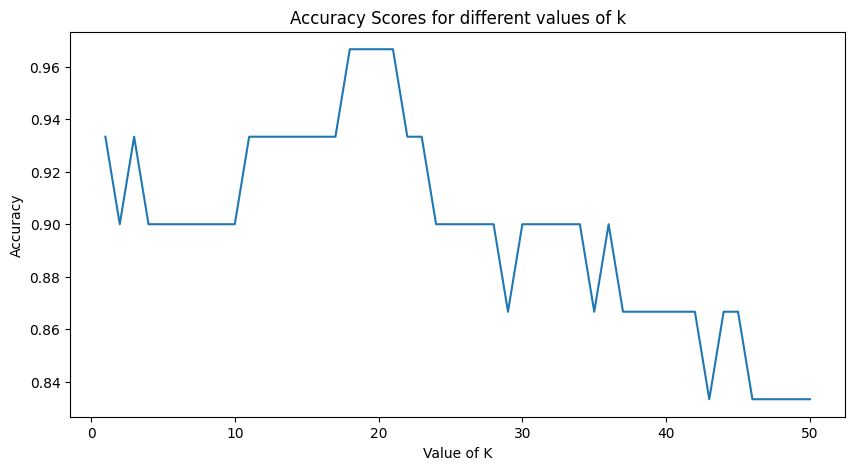

In [ ]:
visualize_scores(val_scores)

In [ ]:
# Obtener el mejor K en base a la gráfica anterior
# Usar numpy (np.argmax)
import numpy as np
best_k = np.argmax(val_scores)
print(f'Mejor k: {best_k +1}')

Mejor k: 18


## 2. Entrenar con el mejor K

- Entrenar el clasificador de KNN con el mejor K encontrado.
- Obtener predicciones de entrenamiento y validación
- Calcular y mostrar el accuracy de entrenamiento y validación


In [ ]:
# Importamos al clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador y especificar hiperparámetros
model = KNeighborsClassifier(n_neighbors=best_k+1)

# Entrenamos el módelo
model.fit(X_train_scaled, y_train)

# Realizamos predicciones
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# Predicciones
print(f'Prediccion en Entrenamiento: {y_train_pred} \n')
print(f'Prediccion en Validación: {y_val_pred} \n')
train_acc = accuracy_score(y_train, y_train_pred)
print(f'Accuracy de entrenamiento: {train_acc:.3f} \n')
val_acc = accuracy_score(y_val, y_val_pred)
print(f'Accuracy de validación: {val_acc:.3f}\n')




Prediccion en Entrenamiento: [2. 0. 1. 2. 2. 1. 2. 1. 1. 0. 0. 1. 2. 0. 0. 2. 2. 1. 1. 1. 1. 0. 1. 0.
 1. 2. 0. 2. 0. 0. 2. 0. 2. 1. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0. 1. 2.
 1. 2. 2. 2. 1. 1. 1. 0. 0. 0. 2. 0. 0. 0. 1. 1. 1. 1. 2. 1. 1. 0. 0. 2.
 1. 0. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 0. 2. 0. 1. 0. 0.] 

Prediccion en Validación: [1. 1. 0. 0. 0. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 0. 2. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 2. 2.] 

Accuracy de entrenamiento: 0.944 

Accuracy de validación: 0.967



En base a los resultados, **¿obtuvo mejoras a comparación del resultado usando el vecino más cercano?**

*No se entendió la pregunta*

## 3. (Opcional) Probar otros hiperparámetros

Probar otros valores de hiperparámetros como **metrics**, **weights**.

In [ ]:
#Usando otra metrica

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
k_candidates = range(1, 5)
val_scores = []

for k in k_candidates:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    val_acc = precision_score(y_val, y_val_pred,average='micro')
    print(f'Accuracy de validación k{k}: {val_acc:.3f}')
    score = val_acc
    val_scores.append(score)
maximo_valor = max(val_scores)
print(f'\n Valor máximo: {maximo_valor}')

Accuracy de validación k1: 0.933
Accuracy de validación k2: 0.900
Accuracy de validación k3: 0.933
Accuracy de validación k4: 0.900

 Valor máximo: 0.9333333333333333


In [ ]:
#Usando pesos

from sklearn.neighbors import KNeighborsClassifier
k_candidates = range(1, 51)
val_scores = []

for k in k_candidates:
    model = KNeighborsClassifier(n_neighbors=k,weights='distance')
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f'Accuracy de validación k{k}: {val_acc:.3f}')
    score = val_acc
    val_scores.append(score)
#print("Validation scores:", val_scores)
#print(val_scores)
maximo_valor = max(val_scores)
print(f'Valor máximo: {maximo_valor}')



Accuracy de validación k1: 0.933
Accuracy de validación k2: 0.933
Accuracy de validación k3: 0.933
Accuracy de validación k4: 0.933
Accuracy de validación k5: 0.933
Accuracy de validación k6: 0.900
Accuracy de validación k7: 0.900
Accuracy de validación k8: 0.900
Accuracy de validación k9: 0.933
Accuracy de validación k10: 0.933
Accuracy de validación k11: 0.933
Accuracy de validación k12: 0.933
Accuracy de validación k13: 0.933
Accuracy de validación k14: 0.933
Accuracy de validación k15: 0.933
Accuracy de validación k16: 0.933
Accuracy de validación k17: 0.933
Accuracy de validación k18: 0.933
Accuracy de validación k19: 0.967
Accuracy de validación k20: 0.967
Accuracy de validación k21: 0.933
Accuracy de validación k22: 0.933
Accuracy de validación k23: 0.967
Accuracy de validación k24: 0.967
Accuracy de validación k25: 0.967
Accuracy de validación k26: 0.933
Accuracy de validación k27: 0.967
Accuracy de validación k28: 0.967
Accuracy de validación k29: 0.967
Accuracy de validación 

## 4. Predicciones en la data de prueba

Recordar que la data de prueba se encuentra en las variables ``X_test`` y  ``y_test``. Realizar lo siguiente:

- Standarizar la data usando el escalador usado anteriormente
- Obtener predicciones para la data de prueba
- Calcular el accuracy de la data de prueba


In [ ]:
# Estandarizamos la data de Prueba
X_test_scaled = scaler.transform(X_test)

print("Algunos datos de prueba  estandarizados")
print(X_test_scaled[0:5])


Algunos datos de prueba  estandarizados
[[ 0.30506593 -0.67959102  0.54382822  0.014519  ]
 [-0.17661712  1.49703503 -1.13427028 -1.16152029]
 [ 2.23179814 -1.11491624  1.77443379  1.45190037]
 [ 0.18464517 -0.46192842  0.43195499  0.4065321 ]
 [ 1.14801127 -0.67959102  0.59976484  0.27586107]]


In [ ]:
# Importamos al clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador y especificar hiperparámetros
model = KNeighborsClassifier(n_neighbors=best_k+1)

# Entrenamos el módelo
model.fit(X_train_scaled, y_train)

# Realizamos predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Predicciones
print(f'Prediccion en Entrenamiento: {y_train_pred} \n')
print(f'Prediccion en Prueba: {y_test_pred} \n')
train_acc = accuracy_score(y_train, y_train_pred)
print(f'Accuracy de entrenamiento: {train_acc:.3f} \n')
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy de Prueba: {test_acc:.3f}\n')



Prediccion en Entrenamiento: [2. 0. 1. 2. 2. 1. 2. 1. 1. 0. 0. 1. 2. 0. 0. 2. 2. 1. 1. 1. 1. 0. 1. 0.
 1. 2. 0. 2. 0. 0. 2. 0. 2. 1. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0. 1. 2.
 1. 2. 2. 2. 1. 1. 1. 0. 0. 0. 2. 0. 0. 0. 1. 1. 1. 1. 2. 1. 1. 0. 0. 2.
 1. 0. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 0. 2. 0. 1. 0. 0.] 

Prediccion en Prueba: [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 1. 0. 2.
 2. 2. 2. 2. 0. 0.] 

Accuracy de entrenamiento: 0.944 

Accuracy de Prueba: 0.967



Comparar los resultados con la data de validación. **¿El modelo generaliza correctamente?**

*Responda aqui*